In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager    # 매 번 크롬 드라이버를 설치할 필요없이 자동으로
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert
from tqdm.notebook import tqdm
from urllib.request import urlopen
import time
import requests
import os
import shutil
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
import urllib.request as req
import urllib.request
from bs4 import BeautifulSoup
import bs4

In [2]:
sample1 = pd.read_csv("C:\\GitTest\\10M_Movie\\analysis\\movie_info_final3.csv")
sample1

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602
...,...,...,...,...,...,...,...,...,...
195,신의 한 수,2014-07-03,"범죄,액션",청소년관람불가,한국,"필름,2D",조범구,"정우성,안성기,이범수,김인권,이시영,안길강,최진혁",3566852
196,코코,2018-01-11,애니메이션,전체관람가,미국,"2D,4D,IMAX",리 언크리치,"가엘 가르시아 베르날,앤서니 곤잘레스,벤자민 브랫",3516880
197,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세이상관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257
198,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672


In [3]:
movie29 = sample1[0:29]
movie29

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602
5,겨울왕국 2,2019-11-21,애니메이션,전체관람가,미국,"2D,3D,4D,IMAX","크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",13750668
6,베테랑,2015-08-05,"액션,드라마",15세이상관람가,한국,"필름,2D",류승완,"황정민,유아인,유해진,오달수",13414484
7,아바타,2009-12-17,"SF,액션,어드벤처",12세이상관람가,미국,"필름,2D,3D,4D,IMAX",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",13338863
8,도둑들,2012-07-25,"액션,범죄",15세이상관람가,"한국,홍콩","필름,2D",최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상",12984701
9,7번방의 선물,2013-01-23,"코미디,드라마",15세이상관람가,한국,"필름,2D",이환경,"류승룡,박신혜,갈소원,오달수,박원상,김정태,정만식,김기천",12812144


In [4]:
d29_dcount=movie29['감독'].unique()
d29_dcount # 검색 리스트에 넣을 변수

array(['김한민', '이병헌', '김용화', '윤제균', '안소니 루소,조 루소', '크리스 벅,제니퍼 리', '류승완',
       '제임스 카메론', '최동훈', '이환경', '가이 리치', '이상용', '추창민', '장훈', '강제규', '연상호',
       '양우석', '강우석', '봉준호', '이준익', '조스 웨던', '크리스토퍼 놀란'], dtype=object)

In [5]:
director_count = len(d29_dcount)
director_count

22

In [6]:
dlist = d29_dcount

In [7]:
driver = webdriver.Chrome("chromedriver")                    
driver.get("https://www.kobis.or.kr/kobis/business/mast/peop/searchPeopleList.do")   # 사이트 접속

search = driver.find_element(By.XPATH, '/html/body/div/div[2]/div[2]/div[3]/form/div[1]/div[1]/div/input')
search.send_keys(dlist[0])

driver.find_element(By.CLASS_NAME, "btn_blue").click()


#### 감독이 검색된 상태에서 '감독'이 있는 목록을 누르고 필모그래피 이동 후, 엑셀 클릭 후 다운, 그리고 x를 클릭

In [8]:
# info = []
# xpath = []


# if len(driver.find_elements(By.TAG_NAME,"tr")) > 2:
#     for i in driver.find_elements(By.TAG_NAME, "tr"):
#         info.append(i.text)

#     indices = [i for i, s in enumerate(info) if '감독' in s]
#     indices

#     driver.find_element(By.XPATH, '/html/body/div/div[2]/div[2]/div[4]/table/tbody/tr{}/td[1]/span/a'.format(indices)).click()

# else:
#     driver.find_element(By.XPATH, '/html/body/div/div[2]/div[2]/div[4]/table/tbody/tr/td[1]/span/a').click()

    
# driver.find_element(By.XPATH, '/html/body/div[2]/div[2]/div[2]/ul/li[2]/a').click()

# time.sleep(2)

# driver.find_element(By.XPATH, '/html/body/div[2]/div[2]/div[3]/div[2]/div[1]/div/a[1]').click()

# time.sleep(1)
#  # 데이터양이 많아 시간이 걸릴수있다는 안내창 팝업으로 뜬다. 자동으로 수락.
# da = Alert(driver)
# da.accept()

# time.sleep(1)

# driver.find_element(By.XPATH, '/html/body/div[2]/div[2]/div[1]/a[2]/span').click()



In [9]:
dlist

array(['김한민', '이병헌', '김용화', '윤제균', '안소니 루소,조 루소', '크리스 벅,제니퍼 리', '류승완',
       '제임스 카메론', '최동훈', '이환경', '가이 리치', '이상용', '추창민', '장훈', '강제규', '연상호',
       '양우석', '강우석', '봉준호', '이준익', '조스 웨던', '크리스토퍼 놀란'], dtype=object)

In [10]:
#감독명이 2개로 뜨는 김용화 지우기 + 추후 추가
d29_dcount[2]

'김용화'

In [11]:
d29_dcount = np.delete(d29_dcount, 2)

In [12]:
d29_dcount # 김용화 지운 버전

array(['김한민', '이병헌', '윤제균', '안소니 루소,조 루소', '크리스 벅,제니퍼 리', '류승완',
       '제임스 카메론', '최동훈', '이환경', '가이 리치', '이상용', '추창민', '장훈', '강제규', '연상호',
       '양우석', '강우석', '봉준호', '이준익', '조스 웨던', '크리스토퍼 놀란'], dtype=object)

In [52]:
d29_dcount[3] = "안소니 루소" # 안소니 루소 단일화

In [53]:
d29_dcount[4]

'크리스 벅,제니퍼 리'

In [54]:
d29_dcount[4] = "크리스 벅" # 크리스 벅 단일화

In [55]:
d29_dcount # 김용화 지우고, 안소니 루소, 크리스 벅 단일해결

array(['김한민', '이병헌', '윤제균', '안소니 루소', '크리스 벅', '류승완', '제임스 카메론', '최동훈',
       '이환경', '가이 리치', '이상용', '추창민', '장훈', '강제규', '연상호', '양우석', '강우석',
       '봉준호', '이준익', '조스 웨던', '크리스토퍼 놀란'], dtype=object)

In [56]:
d29_dcount[10]

'이상용'

In [57]:
d29_dcount = np.delete(d29_dcount, 10) # 감독명 2개로 뜨는 이상용 삭제 + 추후 추가

In [59]:
d29_dcount[11]

'장훈'

In [60]:
d29_dcount = np.delete(d29_dcount, 11) # X장훈으로 여러명뜨는 장훈 삭제 + 추후 추가

In [62]:
d29_dcount

array(['김한민', '이병헌', '윤제균', '안소니 루소', '크리스 벅', '류승완', '제임스 카메론', '최동훈',
       '이환경', '가이 리치', '추창민', '강제규', '연상호', '양우석', '강우석', '봉준호', '이준익',
       '조스 웨던', '크리스토퍼 놀란'], dtype=object)

In [63]:
len(d29_dcount)

19

In [64]:
dlist = d29_dcount
len(dlist)

19

In [65]:
driver = webdriver.Chrome("chromedriver")                    
driver.get("https://www.kobis.or.kr/kobis/business/mast/peop/searchPeopleList.do")   # 사이트 접속

info = []
xpath = []
dlist = d29_dcount

for i in range(len(dlist)):
    search = driver.find_element(By.XPATH, '/html/body/div/div[2]/div[2]/div[3]/form/div[1]/div[1]/div/input')
    search.send_keys(dlist[i])

    driver.find_element(By.CLASS_NAME, "btn_blue").click()
    time.sleep(2)
        


    if len(driver.find_elements(By.TAG_NAME,"tr")) > 2:
        for i in driver.find_elements(By.TAG_NAME, "tr"):
            info.append(i.text)

        indices = [i for i, s in enumerate(info) if '감독' in s]
        indices

        driver.find_element(By.XPATH, '/html/body/div/div[2]/div[2]/div[4]/table/tbody/tr{}/td[1]/span/a'.format(indices)).click()

    else:
        driver.find_element(By.XPATH, '/html/body/div/div[2]/div[2]/div[4]/table/tbody/tr/td[1]/span/a').click()


    driver.find_element(By.XPATH, '/html/body/div[2]/div[2]/div[2]/ul/li[2]/a').click()

    time.sleep(2)

    driver.find_element(By.XPATH, '/html/body/div[2]/div[2]/div[3]/div[2]/div[1]/div/a[1]').click()

    time.sleep(1)
     # 데이터양이 많아 시간이 걸릴수있다는 안내창 팝업으로 뜬다. 자동으로 수락.
    da = Alert(driver)
    da.accept()

    time.sleep(1)

    driver.find_element(By.XPATH, '/html/body/div[2]/div[2]/div[1]/a[2]/span').click()

    time.sleep(2)

    search.clear()
    
    info = []
    
    time.sleep(1)

In [38]:
#  삭제했던 감독 다운받기 
# 김용화
# 이상용
# 장훈

In [13]:
import openpyxl

### 다운받은 엑셀 전처리
- 파일 읽어오기
- 결측치 제거하기
- 이름_final

### 추가 전처리
- 감독역할 아닌 작품 모두 제거
- 확장판, 감독판, 특별판 제거
- 조감독 제거

#### (1) GuyRitchie

In [14]:
GuyRitchie = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\GuyRitchie.xlsx", header = 3)
# xls를 xlsx로 바꾸고 openpyxl을 임포트했더니 정상적으로 읽어왔다

In [15]:
GuyRitchie.dropna(inplace=True)
GuyRitchie = GuyRitchie[GuyRitchie["역할"].str.contains("감독")]

In [16]:
len(GuyRitchie)

8

In [17]:
GuyRitchie.to_csv('GuyRitchie_final.csv', index=False)

In [18]:
GuyRitchie_final = pd.read_csv('GuyRitchie_final.csv')

In [19]:
GuyRitchie_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,캐시트럭,Wrath of Man,2021,미국,액션,감독,2.157865e+09,227065.0,2.182508e+09,231992.0
1,젠틀맨,The Gentlemen,2020,미국,"범죄,액션",감독,6.656587e+08,81482.0,6.656587e+08,81482.0
2,알라딘,Aladdin,2018,미국,"어드벤처,가족,판타지",감독,1.069836e+11,12555894.0,1.090420e+11,12797927.0
3,킹 아서: 제왕의 검,King Arthur: Legend of the Sword,2017,"영국,호주,미국","판타지,액션,어드벤처",감독,3.373679e+09,415714.0,3.373679e+09,415714.0
4,맨 프롬 UNCLE,The Man From U.N.C.L.E.,2015,미국,"액션,어드벤처,코미디",감독,8.463904e+08,108551.0,8.463904e+08,108551.0
5,셜록홈즈 : 그림자 게임,Sherlock Holmes: A Game of Shadows,2011,미국,"액션,미스터리",감독,1.667091e+10,2239156.0,1.667091e+10,2239156.0
6,셜록 홈즈,Sherlock Holmes,2009,"미국,영국","미스터리,범죄,어드벤처",감독,1.620751e+10,2207751.0,1.603681e+10,2184425.0
7,리볼버,Revolver,2005,영국,"범죄,드라마",감독,1.556450e+07,1597.0,1.556450e+07,1597.0


In [20]:
#GuyRitchie_final.index = GuyRitchie_final.index + 1

In [21]:
GuyRitchie_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,캐시트럭,Wrath of Man,2021,미국,액션,감독,2.157865e+09,227065.0,2.182508e+09,231992.0
1,젠틀맨,The Gentlemen,2020,미국,"범죄,액션",감독,6.656587e+08,81482.0,6.656587e+08,81482.0
2,알라딘,Aladdin,2018,미국,"어드벤처,가족,판타지",감독,1.069836e+11,12555894.0,1.090420e+11,12797927.0
3,킹 아서: 제왕의 검,King Arthur: Legend of the Sword,2017,"영국,호주,미국","판타지,액션,어드벤처",감독,3.373679e+09,415714.0,3.373679e+09,415714.0
4,맨 프롬 UNCLE,The Man From U.N.C.L.E.,2015,미국,"액션,어드벤처,코미디",감독,8.463904e+08,108551.0,8.463904e+08,108551.0
5,셜록홈즈 : 그림자 게임,Sherlock Holmes: A Game of Shadows,2011,미국,"액션,미스터리",감독,1.667091e+10,2239156.0,1.667091e+10,2239156.0
6,셜록 홈즈,Sherlock Holmes,2009,"미국,영국","미스터리,범죄,어드벤처",감독,1.620751e+10,2207751.0,1.603681e+10,2184425.0
7,리볼버,Revolver,2005,영국,"범죄,드라마",감독,1.556450e+07,1597.0,1.556450e+07,1597.0


#### (2) Kang Woosuk

In [22]:
KangWoosuk = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\KangWoosuk.xlsx", header = 3)
KangWoosuk.dropna(inplace=True)
KangWoosuk = KangWoosuk[KangWoosuk["역할"].str.contains("감독")]
KangWoosuk.to_csv('KangWoosuk_final.csv', index=False)
KangWoosuk_final = pd.read_csv('KangWoosuk_final.csv')
KangWoosuk_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,"고산자, 대동여지도",The Map Against the World,2016,한국,사극,감독,7.801007e+09,974262.0,7.801007e+09,974262.0
1,전설의 주먹,Fists of Legend,2012,한국,"드라마,액션",감독,1.277731e+10,1744585.0,1.277731e+10,1744585.0
2,글러브,GLOVE,2010,한국,드라마,감독,1.375757e+10,1888100.0,1.375611e+10,1887733.0
3,이끼,Moss,2010,한국,"드라마,스릴러","감독,제작",2.585631e+10,3408144.0,2.543734e+10,3350311.0
4,강철중: 공공의 적 1-1,Public Enemy Returns,2008,한국,"드라마,액션",감독,2.846576e+10,4300670.0,2.863847e+10,4313102.0
5,한반도,Hanbando,2006,한국,"드라마,액션",감독,0.000000e+00,3880308.0,2.059750e+10,3331593.0
6,공공의 적 2,Another Public Enemy,2005,한국,드라마,감독,0.000000e+00,3911356.0,2.009114e+10,3134424.0
7,실미도,Silmido,2003,한국,전쟁,감독,0.000000e+00,11081000.0,1.092393e+10,1719167.0
8,생과부 위자료 청구소송,Bedroom And Courtroom,1998,한국,"드라마,코미디","감독,투자",0.000000e+00,147037.0,0.000000e+00,0.0
9,투캅스 2,Two Cops 2,1996,한국,"코미디,액션",감독,0.000000e+00,636047.0,5.000000e+03,1.0


#### (3) KangJekyu

In [23]:
KangJekyu = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\KangJekyu.xlsx", header = 3)
KangJekyu.dropna(inplace=True)
KangJekyu = KangJekyu[KangJekyu["역할"].str.contains("감독")]
KangJekyu.to_csv('KangJekyu_final.csv', index=False)
KangJekyu_final = pd.read_csv('KangJekyu_final.csv')
KangJekyu_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,장수상회,Salut d’Amour,2014,한국,"멜로/로맨스,드라마","감독,각색",8.729413e+09,1163575.0,8.744702e+09,1167088.0
1,마이 웨이,My Way,2011,"한국,일본,중국","전쟁,액션,드라마","감독,기획,시나리오(각본)",1.599480e+10,2142622.0,1.599519e+10,2142670.0
2,태극기 휘날리며,TaeGukGi: Brotherhood Of War,2004,한국,"전쟁,드라마","감독,시나리오(각본),기획",0.000000e+00,11746135.0,1.575120e+10,2553338.0
3,쉬리,Swiri,1999,한국,"액션,드라마,멜로/로맨스,미스터리","감독,시나리오(각본)",0.000000e+00,5820000.0,1.014000e+06,169.0
4,은행나무 침대,The Gingko Bed,1996,한국,"판타지,멜로/로맨스","감독,시나리오(각본)",0.000000e+00,452580.0,7.000000e+04,9.0


### (4) KimYonghwa

In [24]:
KimYonghwa = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\KimYonghwa.xlsx", header = 3)
KimYonghwa.dropna(inplace=True)
KimYonghwa = KimYonghwa[KimYonghwa["역할"].str.contains("감독")]
KimYonghwa.to_csv('KimYonghwa_final.csv', index=False)
KimYonghwa_final = pd.read_csv('KimYonghwa_final.csv')
KimYonghwa_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,신과함께-인과 연,Along with the Gods: The Last 49 Days,2017,한국,"판타지,드라마","감독,제작,시나리오(각본)",1.026661e+11,12274996.0,1.026893e+11,12278010.0
1,신과함께-죄와 벌,Along with the Gods: The Two Worlds,2017,한국,"판타지,드라마","감독,시나리오(각본),제작",1.156987e+11,14410754.0,1.157275e+11,14414658.0
2,미스터 고,Mr. Go,2013,"한국,중국","코미디,드라마","감독,시나리오(각본)-각본,제작,기획,각색,편집",9.337990e+09,1328890.0,9.339014e+09,1329061.0
3,국가대표,Take Off,2009,한국,"드라마,액션,코미디","감독,시나리오(각본),기획",6.089663e+10,8487894.0,5.757077e+10,8035181.0
4,미녀는 괴로워,200 Pounds Beauty,2006,한국,"멜로/로맨스,코미디","감독,시나리오(각본)",0.000000e+00,6619498.0,3.629285e+10,6081480.0


In [25]:
#KimYonghwa_final.drop([0,1,2,6], inplace=True)


In [26]:
KimYonghwa_final.to_csv('KimYonghwa_final.csv', index=False)
KimYonghwa_final = pd.read_csv('KimYonghwa_final.csv')
KimYonghwa_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,신과함께-인과 연,Along with the Gods: The Last 49 Days,2017,한국,"판타지,드라마","감독,제작,시나리오(각본)",1.026661e+11,12274996.0,1.026893e+11,12278010.0
1,신과함께-죄와 벌,Along with the Gods: The Two Worlds,2017,한국,"판타지,드라마","감독,시나리오(각본),제작",1.156987e+11,14410754.0,1.157275e+11,14414658.0
2,미스터 고,Mr. Go,2013,"한국,중국","코미디,드라마","감독,시나리오(각본)-각본,제작,기획,각색,편집",9.337990e+09,1328890.0,9.339014e+09,1329061.0
3,국가대표,Take Off,2009,한국,"드라마,액션,코미디","감독,시나리오(각본),기획",6.089663e+10,8487894.0,5.757077e+10,8035181.0
4,미녀는 괴로워,200 Pounds Beauty,2006,한국,"멜로/로맨스,코미디","감독,시나리오(각본)",0.000000e+00,6619498.0,3.629285e+10,6081480.0


### (5) KimHanmin

In [27]:
KimHanmin = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\kimhanmin.xlsx", header = 3)
KimHanmin.dropna(inplace=True)
KimHanmin = KimHanmin[KimHanmin["역할"].str.contains("감독")]
KimHanmin

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,한산 리덕스,Hansan: Rising Dragon REDUX,2021,한국,"액션,드라마","감독,조연-권율역,제작,시나리오(각본)",1.692592e+08,19314.0,1.702732e+08,19392.0
1,한산: 용의 출현,Hansan: Rising Dragon,2021,한국,"액션,드라마","감독,조연-권율역,제작,시나리오(각본)",7.370063e+10,7264934.0,7.370063e+10,7264934.0
6,명량: 회오리 바다를 향하여,Roaring Currents: The Road of the Admiral,2015,한국,다큐멘터리,"감독,주연,기획",6.417050e+07,8897.0,6.417050e+07,8897.0
7,명량,The Admiral: Roaring Currents,2013,한국,"사극,액션","감독,시나리오(각본)-각본,기획,제작",1.357484e+11,17613682.0,1.357587e+11,17615919.0
8,최종병기 활 감독확장판,War of the Arrows (Director's Cut),2011,한국,"사극,액션","감독,시나리오(각본)",8.637400e+07,11547.0,8.637400e+07,11547.0
9,최종병기 활,War of the Arrows,2011,한국,"사극,액션","감독,시나리오(각본)",5.582786e+10,7470633.0,5.582786e+10,7470633.0
10,핸드폰,Handphone,2008,한국,스릴러,"감독,단역-심부름 센터남2역,각색",4.271781e+09,630049.0,4.221938e+09,622486.0
11,극락도 살인사건,Paradise Murdered,2007,한국,"공포(호러),미스터리,스릴러","감독,시나리오(각본)",0.000000e+00,2259511.0,1.332893e+10,2079989.0


In [28]:
# 명량 확장판 자르기
# 활 확장판 자르기
KimHanmin.drop([0,6,8], inplace=True)

In [29]:
KimHanmin.to_csv('KimHanmin_final.csv', index=False)
KimHanmin_final = pd.read_csv('KimHanmin_final.csv')
KimHanmin_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,한산: 용의 출현,Hansan: Rising Dragon,2021,한국,"액션,드라마","감독,조연-권율역,제작,시나리오(각본)",7.370063e+10,7264934.0,7.370063e+10,7264934.0
1,명량,The Admiral: Roaring Currents,2013,한국,"사극,액션","감독,시나리오(각본)-각본,기획,제작",1.357484e+11,17613682.0,1.357587e+11,17615919.0
2,최종병기 활,War of the Arrows,2011,한국,"사극,액션","감독,시나리오(각본)",5.582786e+10,7470633.0,5.582786e+10,7470633.0
3,핸드폰,Handphone,2008,한국,스릴러,"감독,단역-심부름 센터남2역,각색",4.271781e+09,630049.0,4.221938e+09,622486.0
4,극락도 살인사건,Paradise Murdered,2007,한국,"공포(호러),미스터리,스릴러","감독,시나리오(각본)",0.000000e+00,2259511.0,1.332893e+10,2079989.0


### (6) RyooSeungwan

In [30]:
RyooSeungwan = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\RyooSeungwan.xlsx", header = 3)
RyooSeungwan.dropna(inplace=True)
RyooSeungwan = RyooSeungwan[RyooSeungwan["역할"].str.contains("감독")]
RyooSeungwan.to_csv('RyooSeungwan_final.csv', index=False)
RyooSeungwan_final = pd.read_csv('RyooSeungwan_final.csv')
RyooSeungwan_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,모가디슈,Escape from Mogadishu,2021,한국,"액션,드라마","감독,시나리오(각본)",3.455830e+10,3613984.0,3.460172e+10,3619202.0
1,군함도,The Battleship Island,2017,한국,"액션,드라마","감독,시나리오(각본)-각본,기획",5.051057e+10,6592151.0,5.051057e+10,6592151.0
2,베테랑,Veteran,2014,한국,"액션,드라마","감독,시나리오(각본)-각본",1.051682e+11,13414009.0,1.051709e+11,13414484.0
3,신촌좀비만화,MAD SAD BAD,2014,한국,드라마,감독,5.152570e+07,5187.0,5.178670e+07,5225.0
4,베를린,The Berlin File,2012,"한국,독일",액션,"감독,시나리오(각본)-각본,기획",5.235493e+10,7166199.0,5.235837e+10,7166688.0
5,부당거래,The Unjust,2010,한국,"범죄,드라마","감독,각색,제작-공동제작",2.132698e+10,2766436.0,2.101123e+10,2725860.0
6,다찌마와리,Dachimawa Lee,2007,한국,"액션,어드벤처,코미디","감독,단역(목소리),시나리오(각본)-각본",4.131701e+09,628508.0,4.128754e+09,628359.0
7,짝패,The City of Violence,2006,한국,액션,"감독,주연-유석환 역,시나리오(각본)-각본,제작",0.000000e+00,1196520.0,6.585376e+09,1021638.0
8,다섯 개의 시선,If You Were Me,2004,한국,다큐멘터리,감독,0.000000e+00,12621.0,4.369900e+07,6593.0
9,주먹이 운다(Crying Fist),Crying Fist,2004,한국,드라마,"감독,시나리오(각본)",0.000000e+00,1728477.0,9.322812e+09,1462972.0


### (7)BongJoonho

In [31]:
BongJoonho = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\BongJoonho.xlsx", header = 3)
BongJoonho.dropna(inplace=True)
BongJoonho = BongJoonho[BongJoonho["역할"].str.contains("감독")]
BongJoonho.drop([1], inplace=True)

In [32]:
BongJoonho.to_csv('BongJoonho_final.csv', index=False)
BongJoonho_final = pd.read_csv('BongJoonho_final.csv')
BongJoonho_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,기생충,PARASITE,2019,한국,드라마,"감독,음악진행,시나리오(각본)",8.745983e+10,10313086.0,8.746397e+10,10313519.0
1,설국열차,Snowpiercer,2013,"한국,체코","SF,액션","감독,시나리오(각본)-각본,스토리-스크린스토리",6.701008e+10,9349991.0,6.703502e+10,9353799.0
2,마더,Mother,2009,한국,드라마,"감독,시나리오(각본)-각본,스토리",2.019537e+10,3013523.0,1.999011e+10,2982025.0
3,도쿄!,Tokyo!,2008,"일본,한국,프랑스",드라마,"감독,시나리오(각본)",2.759559e+08,41198.0,2.784405e+08,41572.0
4,괴물,The Host,2006,한국,"SF,가족,드라마","감독,시나리오(각본)-각본",0.000000e+00,13019740.0,6.671770e+10,10917400.0
5,플란다스의 개,Barking Dogs Never Bite,2000,한국,"드라마,코미디","감독,시나리오(각본)",0.000000e+00,57469.0,4.416200e+06,609.0


### (8) AnthonyRusso

In [33]:
AnthonyRusso = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\AnthonyRusso.xlsx", header = 3)
AnthonyRusso.dropna(inplace=True)
AnthonyRusso = AnthonyRusso[AnthonyRusso["역할"].str.contains("감독")]
AnthonyRusso.to_csv('AnthonyRusso_final.csv', index=False)
AnthonyRusso_final = pd.read_csv('AnthonyRusso_final.csv')
AnthonyRusso_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,그레이 맨,The Gray Man,2022,미국,"액션,스릴러",감독,2.772862e+08,29844.0,2.772862e+08,29844.0
1,어벤져스: 엔드게임,Avengers: Endgame,2018,미국,"액션,SF",감독,1.221827e+11,13934592.0,1.224922e+11,13977602.0
2,어벤져스: 인피니티 워,Avengers: Infinity War,2018,미국,"액션,어드벤처,판타지,SF",감독,9.991901e+10,11211880.0,1.000814e+11,11233176.0
3,캡틴 아메리카: 시빌 워,Captain America: Civil War,2015,미국,"액션,SF,스릴러","감독,시나리오(각본)",7.267211e+10,8677249.0,7.268668e+10,8678761.0
4,캡틴 아메리카: 윈터 솔져,Captain America: The Winter Soldier,2014,미국,"액션,어드벤처,SF",감독,3.171059e+10,3963220.0,3.172843e+10,3964965.0
5,웰컴 투 콜린우드,Welcome To Collinwood,2002,미국,"코미디,범죄",감독,0.000000e+00,185324.0,7.971400e+07,12453.0


### (9) YangWoosuk

In [34]:
YangWoosuk = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\YangWoosuk.xlsx", header = 3)
YangWoosuk.dropna(inplace=True)
YangWoosuk = YangWoosuk[YangWoosuk["역할"].str.contains("감독")]
YangWoosuk.drop([0], inplace=True)

In [35]:
YangWoosuk.to_csv('YangWoosuk_final.csv', index=False)
YangWoosuk_final = pd.read_csv('YangWoosuk_final.csv')
YangWoosuk_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,강철비2: 정상회담,Steel Rain2: Summit,2019,한국,"드라마,액션","감독,시나리오(각본),기획,제작,투자-공동투자",14655366110,1790797,14664106110,1791843
1,강철비,Steel Rain,2017,한국,"액션,드라마","감독,시나리오(각본)-각본,기획",35489576466,4452740,35490646466,4452900
2,변호인,The Attorney,2013,한국,드라마,"감독,시나리오(각본)-각본",82871759300,11374610,82876713788,11375399


### (10) YeonSangho

In [36]:
YeonSangho = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\YeonSangho.xlsx", header = 3)
YeonSangho.dropna(inplace=True)
YeonSangho = YeonSangho[YeonSangho["역할"].str.contains("감독")]
YeonSangho
YeonSangho.drop([5,6,16,19], inplace=True)

In [37]:
YeonSangho.to_csv('YeonSangho_final.csv', index=False)
YeonSangho_final = pd.read_csv('YeonSangho_final.csv')
YeonSangho_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,반도,Peninsula,2020,한국,"액션,드라마","감독,시나리오(각본)",3.307253e+10,3812250.0,3.307869e+10,3812954.0
1,염력,Psychokinesis,2017,한국,"드라마,코미디","감독,시나리오(각본)",7.484644e+09,990104.0,7.484644e+09,990104.0
2,부산행,TRAIN TO BUSAN,2016,한국,"액션,스릴러","감독,단역-관제실(목소리)역(목소리),각색",9.317828e+10,11565479.0,9.318816e+10,11567815.0


### (11) JkYoun

In [38]:
Jkyoun = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\Jkyoun.xlsx", header = 3)
Jkyoun.dropna(inplace=True)
Jkyoun = Jkyoun[Jkyoun["역할"].str.contains("감독")]
Jkyoun.to_csv('Jkyoun_final.csv', index=False)
Jkyoun_final = pd.read_csv('Jkyoun_final.csv')
Jkyoun_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,영웅,Hero,2022,한국,"드라마,뮤지컬","감독,시나리오(각본)",3.224376e+10,3266556.0,3.225125e+10,3267603.0
1,국제시장,Ode to My Father,2014,한국,드라마,"감독,제작,각색",1.109135e+11,14257115.0,1.109476e+11,14264478.0
2,해운대,Haeundae,2009,한국,"액션,드라마,어드벤처","감독,시나리오(각본),제작",8.193464e+10,11453338.0,8.102872e+10,11325117.0
3,1번가의 기적,Miracle on 1st Street,2007,한국,"드라마,코미디","감독,제작",0.000000e+00,2750457.0,1.549412e+10,2535450.0
4,낭만자객,Crazy Assassins,2003,한국,코미디,"감독,시나리오(각본)-각본,제작",0.000000e+00,940134.0,3.128515e+08,48744.0


### (12) LeeByoungheon

In [39]:
LeeByoungheon = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\LeeByoungheon.xlsx", header = 3)
LeeByoungheon.dropna(inplace=True)
LeeByoungheon = LeeByoungheon[LeeByoungheon["역할"].str.contains("감독")]
LeeByoungheon
LeeByoungheon.drop([9], inplace=True)

In [40]:
LeeByoungheon.to_csv('LeeByoungheon_final.csv', index=False)
LeeByoungheon_final = pd.read_csv('LeeByoungheon_final.csv')
LeeByoungheon_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,극한직업,Extreme Job,2018,한국,코미디,감독,1.396480e+11,16264944.0,1.396555e+11,16266338.0
1,바람 바람 바람,What a Man Wants,2017,한국,코미디,"감독,각색",9.784385e+09,1194229.0,9.784385e+09,1194229.0
2,스물,Twenty,2014,한국,"코미디,드라마","감독,시나리오(각본)-각본",2.355899e+10,3044134.0,2.356371e+10,3044859.0


### (13) LeeSangyong

In [41]:
LeeSangyong = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\LeeSangyong.xlsx", header = 3)
LeeSangyong.dropna(inplace=True)
LeeSangyong = LeeSangyong[LeeSangyong["역할"].str.contains("감독")]
LeeSangyong = LeeSangyong[~LeeSangyong["역할"].str.contains("조감독")]
LeeSangyong.to_csv('LeeSangyong_final.csv', index=False)
LeeSangyong_final = pd.read_csv('LeeSangyong_final.csv')
LeeSangyong_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,범죄도시2,The Roundup,2022,한국,"범죄,액션","감독,각색",1.312957e+11,12693175.0,1.312988e+11,12693415.0


### (14) LeeJoonik

In [42]:
LeeJoonik = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\LeeJoonik.xlsx", header = 3)
LeeJoonik.dropna(inplace=True)
LeeJoonik = LeeJoonik[LeeJoonik["역할"].str.contains("감독")]
LeeJoonik
LeeJoonik.drop([1,15], inplace=True)

In [43]:
LeeJoonik.to_csv('LeeJoonik_final.csv', index=False)
LeeJoonik_final = pd.read_csv('LeeJoonik_final.csv')
LeeJoonik_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,자산어보,The Book of Fish,2019,한국,"사극,드라마",감독,3.007565e+09,340763.0,3.016797e+09,342696.0
1,변산,Sunset in My Hometown,2017,한국,드라마,감독,4.014072e+09,490033.0,4.016562e+09,490519.0
2,박열,Anarchist from the colony,2017,한국,드라마,감독,1.809354e+10,2359174.0,1.809711e+10,2359800.0
3,동주,DONGJU; The Portrait of A Poet,2015,한국,드라마,감독,8.870144e+09,1169335.0,8.920846e+09,1176994.0
4,사도,The Throne,2014,한국,사극,감독,4.884290e+10,6246849.0,4.884672e+10,6247745.0
5,소원,Hope,2013,한국,드라마,감독,1.852979e+10,2711071.0,1.853031e+10,2711144.0
6,평양성,Battlefield Heroes,2010,한국,"전쟁,코미디,드라마",감독,1.268453e+10,1717566.0,1.268453e+10,1717566.0
7,구르믈 버서난 달처럼,Blades of Blood,2009,한국,"사극,액션",감독,1.040857e+10,1407681.0,1.024172e+10,1383867.0
8,님은 먼 곳에,Sunny,2008,"한국,태국","드라마,전쟁",감독,1.121124e+10,1706576.0,1.120638e+10,1706495.0
9,즐거운 인생,The Happy Life,2007,한국,드라마,감독,0.000000e+00,1263835.0,7.874566e+09,1202719.0


### (15) LeeHwankyung

In [44]:
LeeHwankyung = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\LeeHwankyung.xlsx", header = 3)
LeeHwankyung.dropna(inplace=True)
LeeHwankyung = LeeHwankyung[LeeHwankyung["역할"].str.contains("감독")]
LeeHwankyung.to_csv('LeeHwankyung_final.csv', index=False)
LeeHwankyung_final = pd.read_csv('LeeHwankyung_final.csv')
LeeHwankyung_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,이웃사촌,Best Friend,2020,한국,"드라마,코미디","감독,제작,시나리오(각본)",3709121750,431559,3709121750,431559
1,7번방의 선물,Miracle in Cell No.7,2012,한국,"코미디,드라마","감독,시나리오(각본),기획",91431914670,12811206,91437368170,12812144
2,챔프,Champ,2011,한국,드라마,"감독,시나리오(각본),프로듀서-기획",3850214500,534752,3850241300,535657
3,각설탕,Lump of Sugar,2006,한국,드라마,"감독,시나리오(각본)",0,1446820,7631785700,1265508
4,그놈은 멋있었다,He was cool,2004,한국,코미디,"감독,단역-체육 선생님역,시나리오(각본)",0,800000,2309055500,372591


### (16) JangHun

In [45]:
JangHun = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\JangHun.xlsx", header = 3)
JangHun.dropna(inplace=True)
JangHun = JangHun[JangHun["역할"].str.contains("감독")]
JangHun = JangHun[~JangHun["역할"].str.contains("조감독")]
JangHun.to_csv('JangHun_final.csv', index=False)
JangHun_final = pd.read_csv('JangHun_final.csv')
JangHun_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,택시운전사,A Taxi Driver,2017,한국,드라마,감독,95855737149,12186684,9.587163e+10,12189706.0
1,고지전,The Front Line,2011,한국,"드라마,전쟁",감독,21968557600,2945137,2.196868e+10,2945151.0
2,의형제,Secret Reunion,2009,한국,"드라마,액션","감독,각색",40800867602,5507106,4.015438e+10,5416923.0
3,영화는 영화다,Rough Cut,2008,한국,"액션,드라마,범죄","감독,각색",8943849000,1307688,8.967441e+09,1311118.0


### (17) JamesCameron

In [46]:
JamesCameron = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\JamesCameron.xlsx", header = 3)
JamesCameron.dropna(inplace=True)
JamesCameron = JamesCameron[JamesCameron["역할"].str.contains("감독")]
JamesCameron
JamesCameron.drop([1,11], inplace=True)

In [47]:
JamesCameron.to_csv('JamesCameron_final.csv', index=False)
JamesCameron_final = pd.read_csv('JamesCameron_final.csv')
JamesCameron_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,아바타: 물의 길,Avatar: The Way of Water,2022,미국,"액션,어드벤처,SF,스릴러",감독,1.375873e+11,10801074.0,1.376395e+11,10804506.0
1,아바타,Avatar,2009,미국,"SF,액션,어드벤처",감독,1.284471e+11,13624328.0,1.253043e+11,13338863.0
2,타이타닉,Titanic,1997,미국,"드라마,멜로/로맨스,액션",감독,0.000000e+00,1971780.0,1.143677e+10,883847.0
3,트루 라이즈,True Lies,1994,미국,"스릴러,액션,어드벤처,코미디","감독,시나리오(각본)",0.000000e+00,874664.0,1.940000e+05,76.0
4,터미네이터2 3D,Terminator II,1991,미국,"액션,SF,스릴러",감독,0.000000e+00,919444.0,1.353848e+08,14391.0
5,심연,The Abyss,1989,미국,"SF,드라마,스릴러,액션,어드벤처","감독,시나리오(각본)",0.000000e+00,80558.0,2.600000e+05,45.0
6,에이리언 2,Aliens,1986,미국,"SF,액션","감독,시나리오(각본)",0.000000e+00,292436.0,1.575700e+07,2013.0
7,터미네이터,Terminator,1984,미국,"SF,액션",감독,0.000000e+00,318828.0,1.080000e+05,24.0


### (18) JossWhedon

In [48]:
JossWhedon = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\JossWhedon.xlsx", header = 3)
JossWhedon.dropna(inplace=True)
JossWhedon = JossWhedon[JossWhedon["역할"].str.contains("감독")]
JossWhedon.to_csv('JossWhedon_final.csv', index=False)
JossWhedon_final = pd.read_csv('JossWhedon_final.csv')
JossWhedon_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,어벤져스: 에이지 오브 울트론,The Avengers: Age of Ultron,2014,미국,"액션,어드벤처,판타지,SF",감독,8.858259e+10,10494499.0,8.864560e+10,10504487.0
1,헛소동,Much Ado About Nothing,2012,미국,드라마,감독,7.683000e+06,1266.0,7.683000e+06,1266.0
2,어벤져스,The Avengers,2012,미국,"액션,SF",감독,5.955785e+10,7074867.0,5.964455e+10,7087971.0


### (19) ChoiDonghoon

In [49]:
ChoiDonghoon = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\ChoiDonghoon.xlsx", header = 3)
ChoiDonghoon.dropna(inplace=True)
ChoiDonghoon = ChoiDonghoon[ChoiDonghoon["역할"].str.contains("감독")]
ChoiDonghoon = ChoiDonghoon[~ChoiDonghoon["역할"].str.contains("조감독")]
ChoiDonghoon.to_csv('ChoiDonghoon_final.csv', index=False)
ChoiDonghoon_final = pd.read_csv('ChoiDonghoon_final.csv')
ChoiDonghoon_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,외계+인 1부,Alienoid,2022.0,한국,"액션,판타지,SF",감독,1.598783e+10,1538504.0,1.599555e+10,1539362.0
1,암살,Assassination,2015.0,한국,"액션,드라마","감독,시나리오(각본)-각본,제작",9.846313e+10,12705700.0,9.846939e+10,12706947.0
2,도둑들,The Thieves,2012.0,"한국,홍콩","액션,범죄","감독,시나리오(각본)-각본",9.366557e+10,12983330.0,9.367250e+10,12984701.0
3,전우치,Jeon Woochi: The Taoist Wizard,2009.0,한국,"액션,코미디,판타지","감독,시나리오(각본)",4.460544e+10,6136928.0,4.409341e+10,6065474.0
4,타짜,Tazza: The High Rollers,2006.0,한국,드라마,"감독,각색",0.000000e+00,6847777.0,3.626348e+10,5692997.0
5,범죄의 재구성,The Big Swindle,2004.0,한국,스릴러,"감독,시나리오(각본)",0.000000e+00,2129358.0,6.138742e+09,943241.0


### (20) ChooChangmin

In [50]:
ChooChangmin = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\ChooChangmin.xlsx", header = 3)
ChooChangmin.dropna(inplace=True)
ChooChangmin.to_csv('ChooChangmin_final.csv', index=False)
ChooChangmin_final = pd.read_csv('ChooChangmin_final.csv')
ChooChangmin_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,7년의 밤,Seven Years of Night,2018,한국,"스릴러,드라마","감독,시나리오(각본)-각본",3.969338e+09,528007.0,3.969338e+09,528007.0
1,"광해, 왕이 된 남자",Masquerade,2012,한국,"사극,드라마","감독,각색",8.890021e+10,12319542.0,8.891328e+10,12324062.0
2,그대를 사랑합니다,Late Blossom,2010,한국,드라마,"감독,시나리오(각본),편집",1.204004e+10,1645126.0,1.205140e+10,1649407.0
3,사랑을 놓치다,Lost In Love,2006,한국,"멜로/로맨스,드라마","감독,시나리오(각본)",0.000000e+00,529138.0,2.961686e+09,468225.0
4,마파도,Mapado: Island of Fortunes,2004,한국,코미디,"감독,각색",0.000000e+00,3090467.0,1.675120e+10,2636857.0


### (21) ChrisBuck

In [51]:
ChrisBuck = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\ChrisBuck.xlsx", header = 3)
ChrisBuck.dropna(inplace=True)
ChrisBuck.drop(ChrisBuck[~(ChrisBuck["역할"] == "감독")].index, inplace=True)
ChrisBuck.to_csv('ChrisBuck_final.csv', index=False)
ChrisBuck_final = pd.read_csv('ChrisBuck_final.csv')
ChrisBuck_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,겨울왕국 2,Frozen 2,2019,미국,애니메이션,감독,1.148104e+11,13747792.0,1.148439e+11,13750668.0
1,겨울왕국,Frozen,2013,미국,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지",감독,8.246150e+10,10296101.0,8.254421e+10,10305051.0
2,서핑 업,Surf`s Up,2007,미국,"애니메이션,드라마,액션,가족",감독,0.000000e+00,294702.0,1.672016e+09,282862.0


### (22) ChristopherNolan

In [52]:
ChristopherNolan = pd.read_excel("C:\\GitTest\\10M_Movie\\analysis\\director\\ChristopherNolan.xlsx", header = 3)
ChristopherNolan.dropna(inplace=True)
ChristopherNolan.drop(ChristopherNolan[~(ChristopherNolan["역할"] == "감독")].index, inplace=True)
ChristopherNolan.to_csv('ChristopherNolan_final.csv', index=False)
ChristopherNolan_final = pd.read_csv('ChristopherNolan_final.csv')
ChristopherNolan_final

,영화명,영화명(영문),제작연도,제작국가,장르,역할,공식통계 매출액,공식통계 관객수,KOBIS통계 매출액,KOBIS통계 관객수
0,테넷,Tenet,2020,미국,"액션,SF",감독,1.846430e+10,1998987.0,1.860158e+10,2009304.0
1,덩케르크,Dunkirk,2017,"미국,영국","액션,드라마,스릴러,전쟁",감독,2.457677e+10,2792705.0,2.482884e+10,2813302.0
2,인터스텔라,Interstellar,2014,"미국,영국",SF,감독,8.229109e+10,10275484.0,8.307262e+10,10342523.0
3,인셉션,Inception,2010,미국,"드라마,미스터리",감독,4.410655e+10,5926948.0,4.509930e+10,6011861.0
4,다크 나이트,The Dark Knight,2008,미국,"범죄,드라마,액션,미스터리",감독,2.705947e+10,4087355.0,2.820842e+10,4228360.0
5,프레스티지,The Prestige,2006,"미국,영국",스릴러,감독,0.000000e+00,646184.0,2.861258e+09,458956.0
6,배트맨 비긴즈,Batman Begins,2005,미국,"범죄,액션,판타지",감독,0.000000e+00,921300.0,5.799228e+09,903202.0


## 그래프를 그려보자

In [77]:
final_list = [GuyRitchie_final, KangWoosuk_final, KangJekyu_final, KimYonghwa_final, KimHanmin_final, RyooSeungwan_final, BongJoonho_final, AnthonyRusso_final, YangWoosuk_final, YeonSangho_final, Jkyoun_final, LeeByoungheon_final, LeeSangyong_final, LeeJoonik_final, LeeHwankyung_final, JangHun_final, JamesCameron_final, JossWhedon_final, ChoiDonghoon_final, ChooChangmin_final, ChrisBuck_final, ChristopherNolan_final]

In [78]:
len(final_list)

22

In [124]:
final_list = [GuyRitchie_final, KangWoosuk_final, KangJekyu_final, KimYonghwa_final, KimHanmin_final, RyooSeungwan_final, BongJoonho_final, AnthonyRusso_final, YangWoosuk_final, YeonSangho_final, Jkyoun_final, LeeByoungheon_final, LeeSangyong_final, LeeJoonik_final, LeeHwankyung_final, JangHun_final, JamesCameron_final, JossWhedon_final, ChoiDonghoon_final, ChooChangmin_final, ChrisBuck_final, ChristopherNolan_final]
dir_list = [GuyRitchie_final, KangWoosuk_final, KangJekyu_final, KimYonghwa_final, KimHanmin_final, RyooSeungwan_final, BongJoonho_final, AnthonyRusso_final, YangWoosuk_final, YeonSangho_final, Jkyoun_final, LeeByoungheon_final, LeeSangyong_final, LeeJoonik_final, LeeHwankyung_final, JangHun_final, JamesCameron_final, JossWhedon_final, ChoiDonghoon_final, ChooChangmin_final, ChrisBuck_final, ChristopherNolan_final]
dir_list1="GuyRitchie_final, KangWoosuk_final, KangJekyu_final, KimYonghwa_final, KimHanmin_final, RyooSeungwan_final, BongJoonho_final, AnthonyRusso_final, YangWoosuk_final, YeonSangho_final, Jkyoun_final, LeeByoungheon_final, LeeSangyong_final, LeeJoonik_final, LeeHwankyung_final, JangHun_final, JamesCameron_final, JossWhedon_final, ChoiDonghoon_final, ChooChangmin_final, ChrisBuck_final, ChristopherNolan_final"
dir_list2 = dir_list1.split(",")
dir_list2

['GuyRitchie_final',
 ' KangWoosuk_final',
 ' KangJekyu_final',
 ' KimYonghwa_final',
 ' KimHanmin_final',
 ' RyooSeungwan_final',
 ' BongJoonho_final',
 ' AnthonyRusso_final',
 ' YangWoosuk_final',
 ' YeonSangho_final',
 ' Jkyoun_final',
 ' LeeByoungheon_final',
 ' LeeSangyong_final',
 ' LeeJoonik_final',
 ' LeeHwankyung_final',
 ' JangHun_final',
 ' JamesCameron_final',
 ' JossWhedon_final',
 ' ChoiDonghoon_final',
 ' ChooChangmin_final',
 ' ChrisBuck_final',
 ' ChristopherNolan_final']

In [125]:
dir_list4 = []
for i in dir_list2:
    dir_list3 = i.split("_")[0]
    dir_list4.append(dir_list3)
dir_list4

['GuyRitchie',
 ' KangWoosuk',
 ' KangJekyu',
 ' KimYonghwa',
 ' KimHanmin',
 ' RyooSeungwan',
 ' BongJoonho',
 ' AnthonyRusso',
 ' YangWoosuk',
 ' YeonSangho',
 ' Jkyoun',
 ' LeeByoungheon',
 ' LeeSangyong',
 ' LeeJoonik',
 ' LeeHwankyung',
 ' JangHun',
 ' JamesCameron',
 ' JossWhedon',
 ' ChoiDonghoon',
 ' ChooChangmin',
 ' ChrisBuck',
 ' ChristopherNolan']

In [130]:
dir_list10

['GuyRitchie_final',
 ' KangJekyu_final',
 ' KimHanmin_final',
 ' YangWoosuk_final',
 ' YeonSangho_final',
 ' LeeByoungheon_final',
 ' LeeSangyong_final',
 ' LeeHwankyung_final',
 ' JangHun_final',
 ' JamesCameron_final']

In [131]:
dir_list11 = []
for i in dir_list10:
    dir_list3 = i.split("_")[0]
    dir_list11.append(dir_list3)
dir_list11

['GuyRitchie',
 ' KangJekyu',
 ' KimHanmin',
 ' YangWoosuk',
 ' YeonSangho',
 ' LeeByoungheon',
 ' LeeSangyong',
 ' LeeHwankyung',
 ' JangHun',
 ' JamesCameron']

Text(0.5, 1.0, '감독별 작품에 따른 관객수 추이')

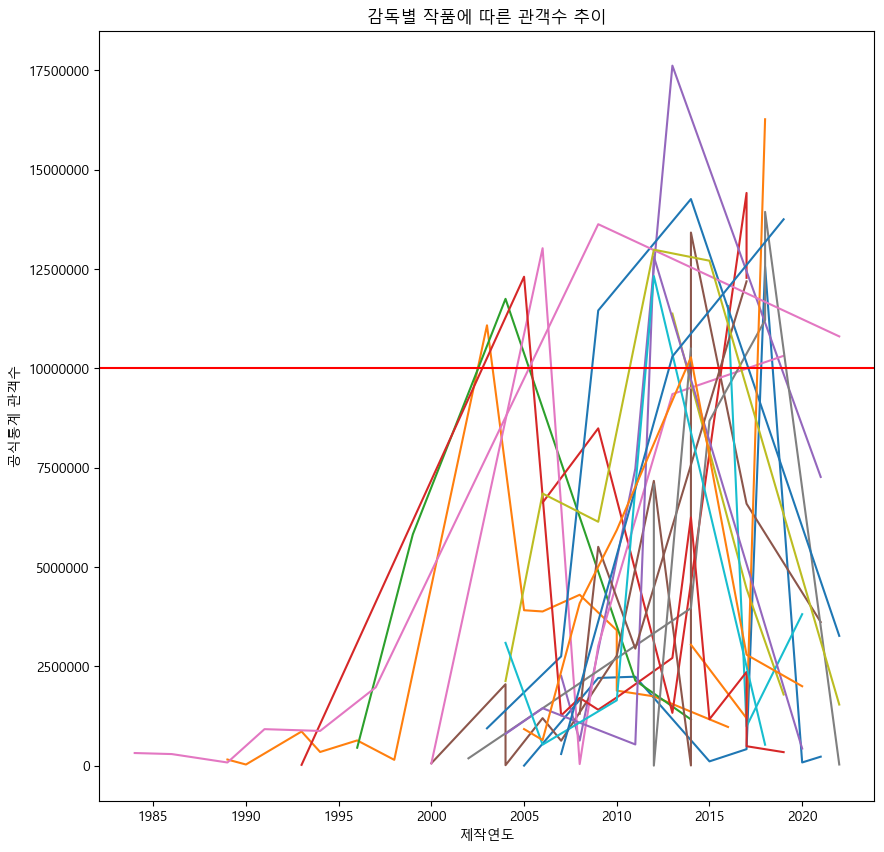

In [86]:
plt.figure(figsize = (10, 10))
for i in final_list:
    plt.plot(i["제작연도"], i["공식통계 관객수"])
plt.xlabel("제작연도")
plt.ylabel("공식통계 관객수")
plt.xticks(range(1985, 2025, 5))
plt.axhline(y=10000000, color="r")
plt.ticklabel_format(axis="y", style="plain")
plt.title("감독별 작품에 따른 관객수 추이")

- 1000만 달성 후 차기 작품중 1000만을 재달성한 감독은 3명 뿐이다
- 봉준호, 김용화, 크리스 벅

- 1000만을 연속달성한 감독은 2명 뿐이다.
- 김용화, 크리스 벅

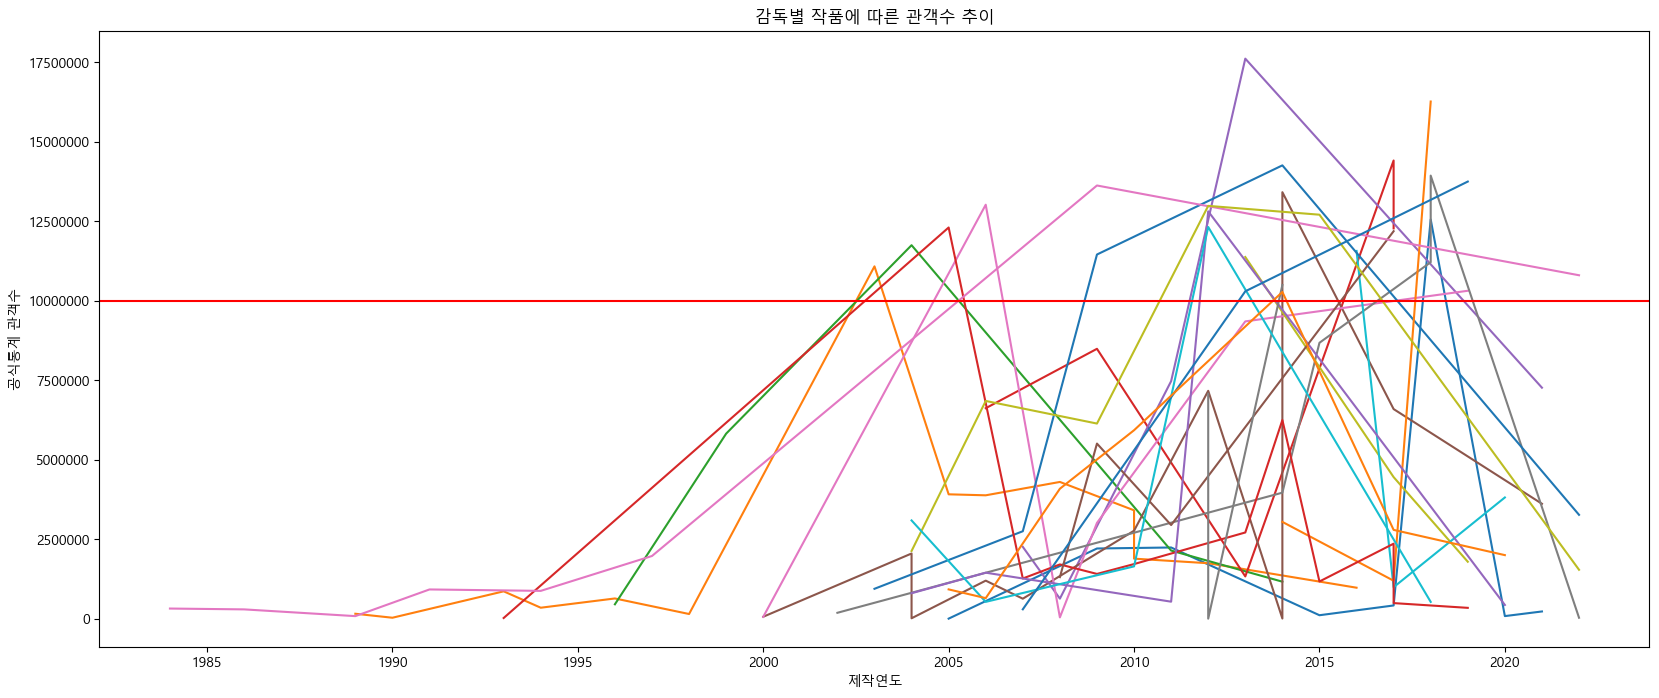

In [87]:
plt.figure(figsize = (20, 8))
for i in final_list:
    plt.plot(i["제작연도"], i["공식통계 관객수"])
plt.xlabel("제작연도")
plt.ylabel("공식통계 관객수")
plt.xticks(range(1985, 2025, 5))
plt.axhline(y=10000000, color="r")
plt.ticklabel_format(axis="y", style="plain")
plt.title("감독별 작품에 따른 관객수 추이")
plt.show()

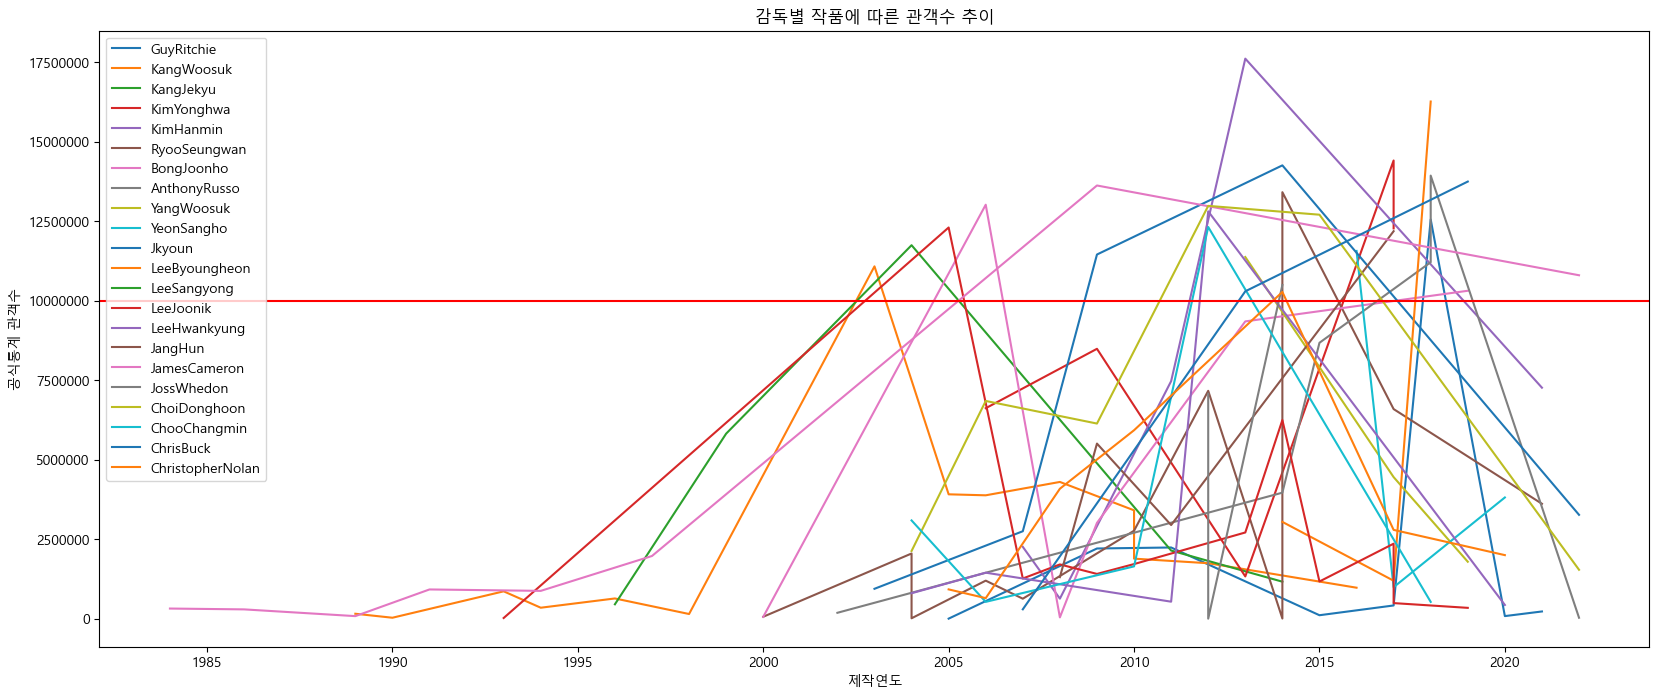

In [88]:
plt.figure(figsize = (20, 8))
for i, director in enumerate(dir_list):
    plt.plot(final_list[i]["제작연도"], final_list[i]["공식통계 관객수"], label=director)
plt.xlabel("제작연도")
plt.ylabel("공식통계 관객수")
plt.xticks(range(1985, 2025, 5))
plt.axhline(y=10000000, color="r")
plt.ticklabel_format(axis="y", style="plain")
plt.title("감독별 작품에 따른 관객수 추이")
plt.legend()
plt.show()

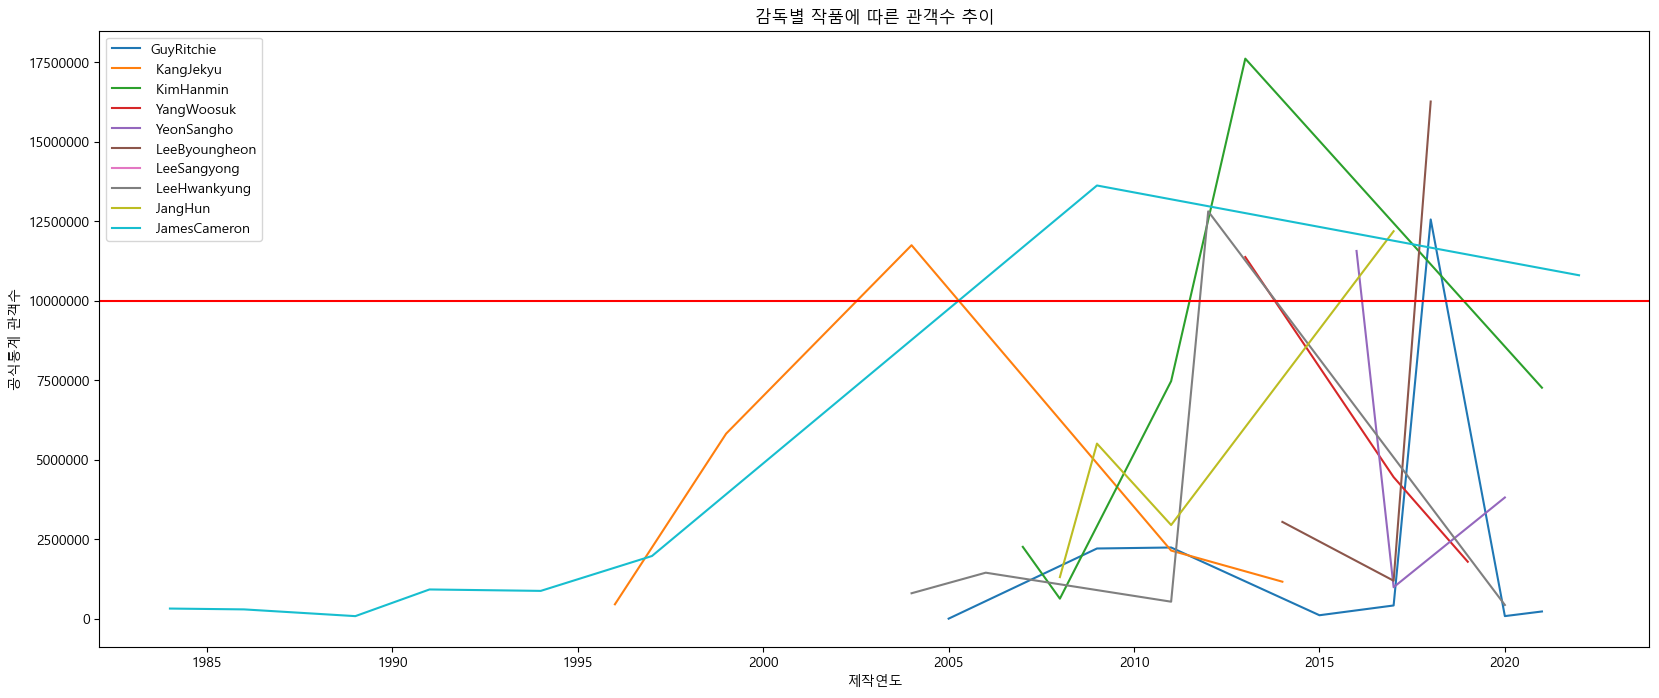

In [132]:
plt.figure(figsize = (20, 8))
for i, director in enumerate(dir_list11):
    plt.plot(final_list10[i]["제작연도"], final_list10[i]["공식통계 관객수"], label=director)
plt.xlabel("제작연도")
plt.ylabel("공식통계 관객수")
plt.xticks(range(1985, 2025, 5))
plt.axhline(y=10000000, color="r")
plt.ticklabel_format(axis="y", style="plain")
plt.title("감독별 작품에 따른 관객수 추이")
plt.legend()
plt.show()

In [129]:
final_list10 = [GuyRitchie_final, KangJekyu_final, KimHanmin_final, YangWoosuk_final, YeonSangho_final, LeeByoungheon_final, LeeSangyong_final, LeeHwankyung_final, JangHun_final, JamesCameron_final]
dir_list10 = "GuyRitchie_final, KangJekyu_final, KimHanmin_final, YangWoosuk_final, YeonSangho_final, LeeByoungheon_final, LeeSangyong_final, LeeHwankyung_final, JangHun_final, JamesCameron_final"
dir_list10 = dir_list10.split(",")
dir_list10

['GuyRitchie_final',
 ' KangJekyu_final',
 ' KimHanmin_final',
 ' YangWoosuk_final',
 ' YeonSangho_final',
 ' LeeByoungheon_final',
 ' LeeSangyong_final',
 ' LeeHwankyung_final',
 ' JangHun_final',
 ' JamesCameron_final']

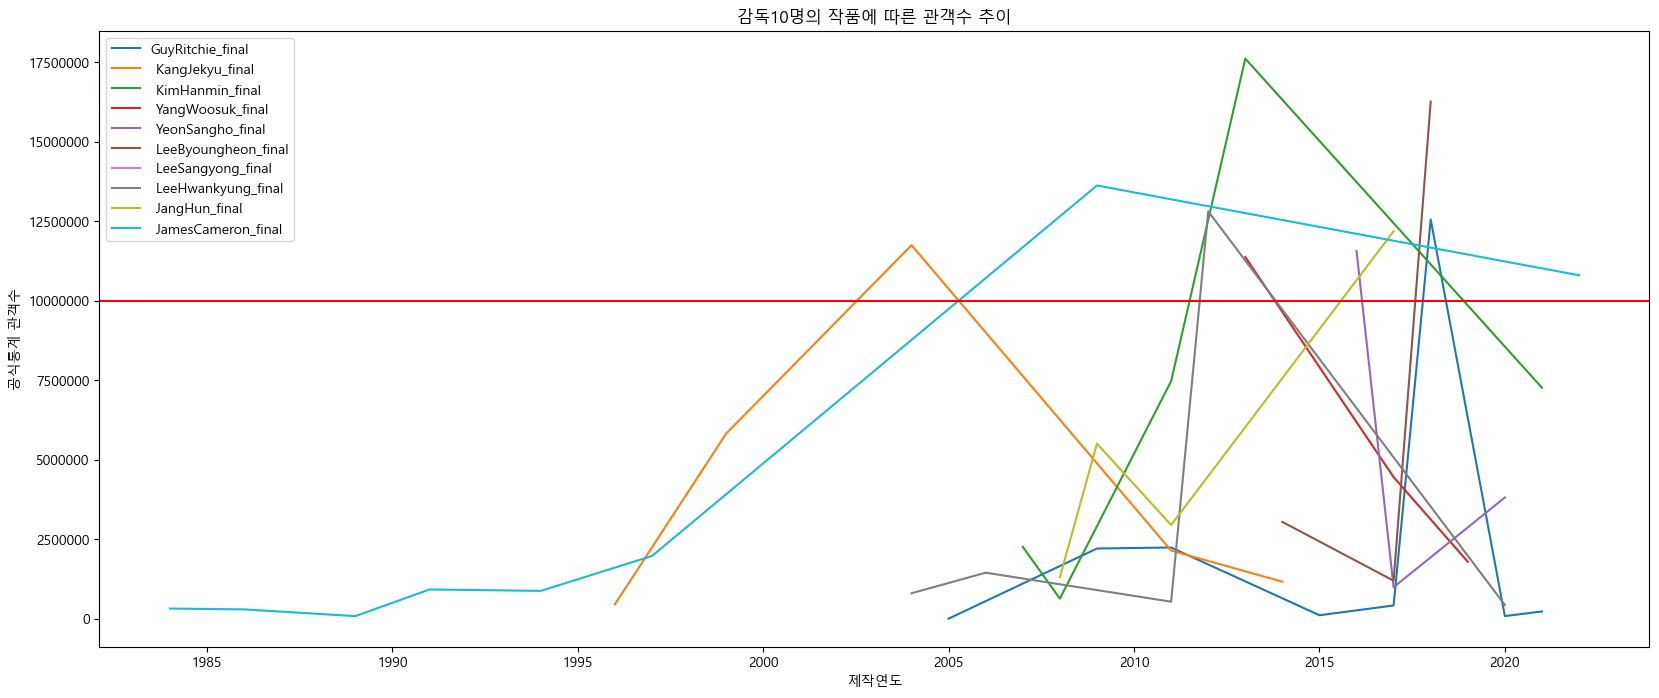

In [102]:
plt.figure(figsize = (20, 8))
for i, director in enumerate(dir_list10):
    plt.plot(final_list10[i]["제작연도"], final_list10[i]["공식통계 관객수"], label=director)
plt.xlabel("제작연도")
plt.ylabel("공식통계 관객수")
plt.xticks(range(1985, 2025, 5))
plt.axhline(y=10000000, color="r")
plt.ticklabel_format(axis="y", style="plain")
plt.title("감독10명의 작품에 따른 관객수 추이")
plt.legend()
plt.show()

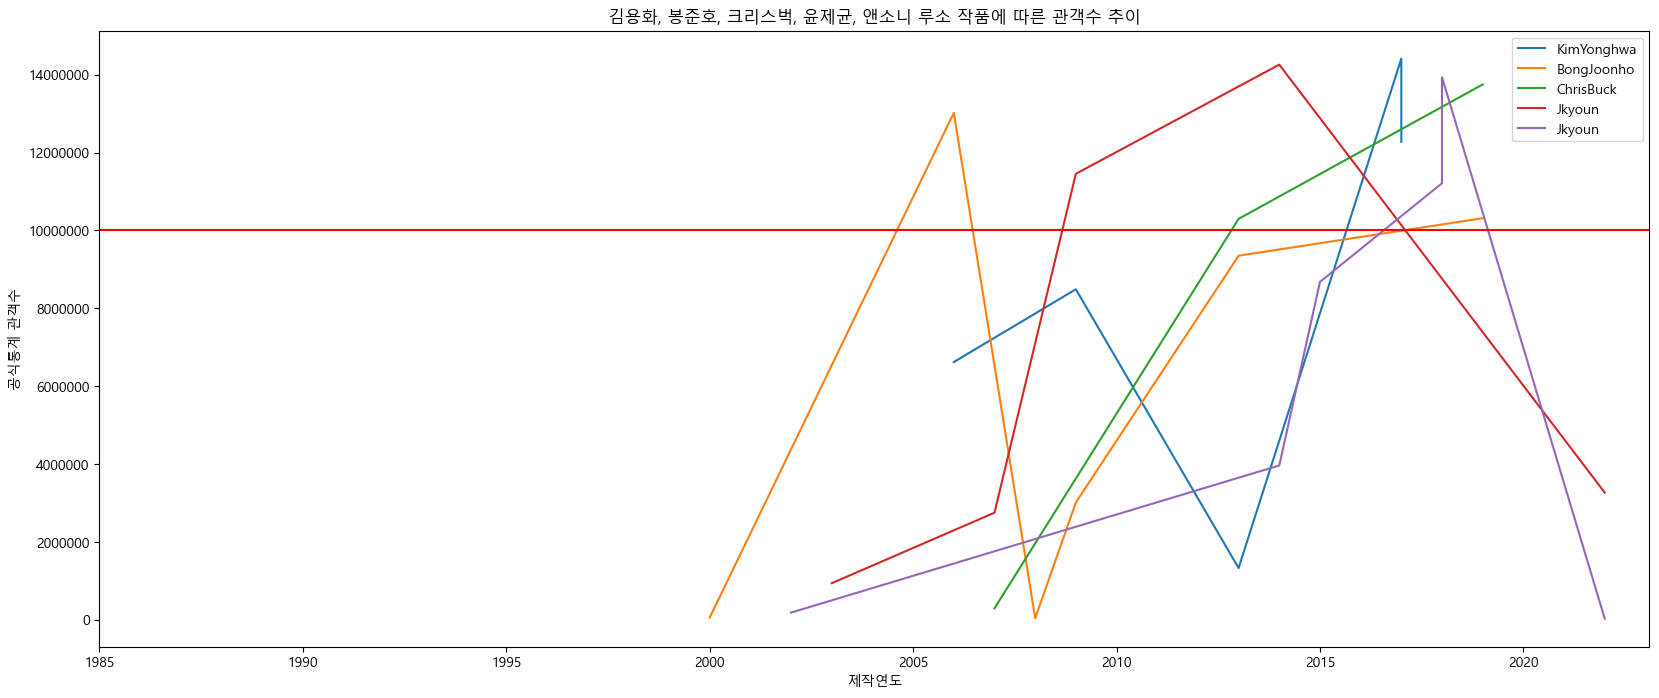

In [96]:
plt.figure(figsize = (20, 8))
plt.plot(KimYonghwa_final["제작연도"], KimYonghwa_final["공식통계 관객수"], label="KimYonghwa")
plt.plot(BongJoonho_final["제작연도"], BongJoonho_final["공식통계 관객수"], label="BongJoonho")
plt.plot(ChrisBuck_final["제작연도"], ChrisBuck_final["공식통계 관객수"], label="ChrisBuck")
plt.plot(Jkyoun_final["제작연도"], Jkyoun_final["공식통계 관객수"], label="Jkyoun")
plt.plot(AnthonyRusso_final["제작연도"], AnthonyRusso_final["공식통계 관객수"], label="Jkyoun")
plt.xlabel("제작연도")
plt.ylabel("공식통계 관객수")
plt.xticks(range(1985, 2025, 5))
plt.axhline(y=10000000, color="r")
plt.ticklabel_format(axis="y", style="plain")
plt.title("김용화, 봉준호, 크리스벅, 윤제균, 앤소니 루소 작품에 따른 관객수 추이")
plt.legend()
plt.show()

In [236]:
def drawdir(i):
    plt.plot(i["제작연도"], i["공식통계 관객수"])
    plt.xlabel("제작연도")
    plt.ylabel("공식통계 관객수")
    plt.xticks(range(1985, 2025, 5))
    plt.axhline(y=10000000, color="r")
    plt.ticklabel_format(axis="y", style="plain")
    plt.title("감독별작품에 따른 관객수 추이")
    plt.show()

In [ ]:
def screen_scatter(x):
    m = pd.read_csv(f"C:\\GitTest\\10M_Movie\\analysis\\director\\GuyRitchie.xlsx/{x}", index_col=0)
    name = (x)[0:4]
    plt.plot(m["제작연도"], m["공식통계 관객수"], alpha = 0.5)
    plt.xlabel("제작연도")
    plt.ylabel("공식통계 관객수")
    plt.xticks(range(1985, 2025, 5))
    plt.axhline(y=10000000, color="r")
    plt.ticklabel_format(axis="y", style="plain")
    plt.title(f'{name}')
    plt.show()

### 봉준호

Text(0.5, 1.0, '봉준호 작품에 따른 관객수 추이')

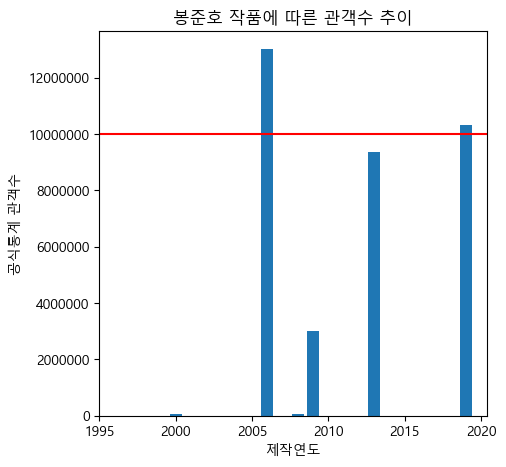

In [239]:
plt.figure(figsize = (5, 5))
plt.bar(BongJoonho_final["제작연도"], BongJoonho_final["공식통계 관객수"])
plt.xlabel("제작연도")
plt.ylabel("공식통계 관객수")
plt.axhline(y=10000000, color="r")
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(range(1995, 2025, 5))
plt.title("봉준호 작품에 따른 관객수 추이")

#### 첫번째 1000만 전과 후 테스트

In [106]:
list_avg_before = []
list_avg = []
list_avg_after = []

for i in final_list:
    
    last_index = None
    for j in range(len(i)):
        if i.loc[j, '공식통계 관객수'] > 10000000:
            last_index = j
    
   
    before = i.index > last_index
    avg_before = i.loc[before, '공식통계 관객수'].mean()
    after = i.index < last_index
    avg_after = i.loc[after, '공식통계 관객수'].mean()
    avg = i.loc[i['공식통계 관객수'] > 10000000, '공식통계 관객수'].mean()
    
    
    list_avg_before.append(avg_before)
    list_avg.append(avg)
    list_avg_after.append(avg_after)

In [107]:
 df = pd.DataFrame({
    '감독명' : dir_list,
    '천만이전평균': list_avg_before,
    '천만돌파관객수': list_avg,
    '천만이후평균': list_avg_after})

In [108]:
df_original = df
df_original

,감독명,천만이전평균,천만돌파관객수,천만이후평균
0,영화명 영...,9.945538e+05,12555894.0,1.542735e+05
1,영화명 ...,3.622583e+05,11081000.0,2.872489e+06
2,영화명 영화명(영문) 제작연...,3.136290e+06,11746135.0,1.653098e+06
3,영화명 영화...,5.478761e+06,13342875.0,1.227500e+07
4,영화명 영화명(영문) 제...,3.453398e+06,17613682.0,7.264934e+06
5,영화명 영화명(영문)...,1.734992e+06,13414009.0,5.103068e+06
6,영화명 영화명(영문) 제작연도 ...,5.746900e+04,11666413.0,5.679450e+06
7,영화명 ...,4.275264e+06,12573236.0,6.982218e+06
8,영화명 영화명(영문) 제작연도 제작국가 ...,NaN,11374610.0,3.121768e+06
9,영화명 영화명(영문) 제작연도 제작국가 장르 ...,NaN,11565479.0,2.401177e+06


### 결측치 제거 후, 남은 감독들의 천만이전, 천만돌파, 천만이후 비교

In [109]:
df_original2 = df_original.drop([8,9,11,12,15,17])
df_original2["천만이전평균"] = df_original2["천만이전평균"].astype(int)
df_original2["천만이후평균"] = df_original2["천만이후평균"].astype(int)
df_original2

,감독명,천만이전평균,천만돌파관객수,천만이후평균
0,영화명 영...,994553,12555894.0,154273
1,영화명 ...,362258,11081000.0,2872489
2,영화명 영화명(영문) 제작연...,3136290,11746135.0,1653098
3,영화명 영화...,5478760,13342875.0,12274996
4,영화명 영화명(영문) 제...,3453397,17613682.0,7264934
5,영화명 영화명(영문)...,1734991,13414009.0,5103067
6,영화명 영화명(영문) 제작연도 ...,57469,11666413.0,5679449
7,영화명 ...,4275264,12573236.0,6982218
10,영화명 영화명(영문) 제작연도 제작국가 ...,1845295,12855226.5,8761835
13,영화명 영화명(영문...,21454,12302831.0,1941288


In [122]:
df_original2.describe().astype(int)

,천만이전평균,천만돌파관객수,천만이후평균
count,16,16,16
mean,2063309,12602293,5482126
std,1785570,1559617,4349595
min,21454,10275484,154273
25%,647777,11952993,1869240
50%,1744950,12437718,5391258
75%,3215566,12847192,7639159
max,5478760,17613682,13747792


In [110]:
df_original2.to_csv('df_original2.csv', index=False)
df_original2 = pd.read_csv('df_original2.csv')

In [111]:
df_original2

,감독명,천만이전평균,천만돌파관객수,천만이후평균
0,영화명 영...,994553,12555894.0,154273
1,영화명 ...,362258,11081000.0,2872489
2,영화명 영화명(영문) 제작연...,3136290,11746135.0,1653098
3,영화명 영화...,5478760,13342875.0,12274996
4,영화명 영화명(영문) 제...,3453397,17613682.0,7264934
5,영화명 영화명(영문)...,1734991,13414009.0,5103067
6,영화명 영화명(영문) 제작연도 ...,57469,11666413.0,5679449
7,영화명 ...,4275264,12573236.0,6982218
8,영화명 영화명(영문) 제작연도 제작국가 ...,1845295,12855226.5,8761835
9,영화명 영화명(영문...,21454,12302831.0,1941288


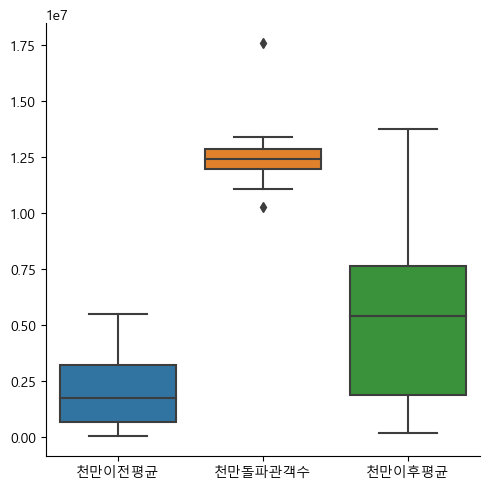

In [112]:
sns.catplot(data=df_original2, kind="box")

In [113]:
selected_cols = df_original2.loc[:, ["천만이전평균", "천만이후평균"]]
selected_cols

,천만이전평균,천만이후평균
0,994553,154273
1,362258,2872489
2,3136290,1653098
3,5478760,12274996
4,3453397,7264934
5,1734991,5103067
6,57469,5679449
7,4275264,6982218
8,1845295,8761835
9,21454,1941288


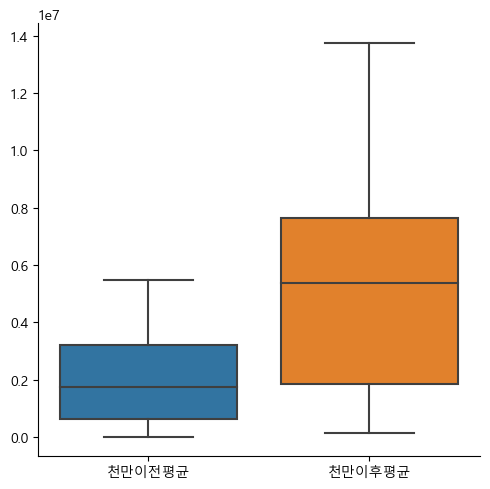

In [114]:
sns.catplot(data=selected_cols, kind="box")

In [115]:
df_original2["천만이전평균"].mean()

2063309.4375

In [116]:
df_original2["천만돌파관객수"].mean()

12602293.5

In [117]:
df_original2["천만이후평균"].mean()

5482126.6875

### 1000만 영화를 찍은 이후와 이전의 차이가 있었다
### 1000만 영화의 경우 소수의 감독(봉준호, 김용화, 크리스벅)이 천만 돌파 후 한번 더 1000만을 찍었다
### 1000만 영화 달성이 해당 영화의 감독의 차기작 관람객수에 영향을 끼쳤다

### 결측치 0 처리 후, 비교

In [118]:
df_original3 = df_original.fillna(0)
df_original3["천만이전평균"] = df_original3["천만이전평균"].astype(int)
df_original3["천만이후평균"] = df_original3["천만이후평균"].astype(int)
df_original3

,감독명,천만이전평균,천만돌파관객수,천만이후평균
0,영화명 영...,994553,12555894.0,154273
1,영화명 ...,362258,11081000.0,2872489
2,영화명 영화명(영문) 제작연...,3136290,11746135.0,1653098
3,영화명 영화...,5478760,13342875.0,12274996
4,영화명 영화명(영문) 제...,3453397,17613682.0,7264934
5,영화명 영화명(영문)...,1734991,13414009.0,5103067
6,영화명 영화명(영문) 제작연도 ...,57469,11666413.0,5679449
7,영화명 ...,4275264,12573236.0,6982218
8,영화명 영화명(영문) 제작연도 제작국가 ...,0,11374610.0,3121768
9,영화명 영화명(영문) 제작연도 제작국가 장르 ...,0,11565479.0,2401177


In [120]:
df_original3.describe().astype(int)

,천만이전평균,천만돌파관객수,천만이후평균
count,22,22,22
mean,1905614,12555276,4238044
std,1740863,1648353,4281815
min,0,10275484,0
25%,311591,11686343,455671
50%,1744950,12311186,2636833
75%,3224055,12836187,7087131
max,5478760,17613682,13747792
